<p align="center">
  <img src="https://raw.githubusercontent.com/marcop11/dem-shadows/main/img/logo.svg"
       width="420" alt="DEMShadows Logo">
</p>

<p align="center">Google Colab Demo</p>

<p align="center">
  <em>Generate terrain shadow rasters from DEM GeoTIFFs</em>
</p>

<p align="center">
  <a href="https://colab.research.google.com/github/marcop11/dem-shadows/blob/main/notebooks/try_it_yourself.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab">
  </a>
</p>

---

## 📌 About This Notebook

This notebook demonstrates **DEM Shadows**, a Python library for computing
high-quality **terrain shadows** from **Digital Elevation Models (DEMs)** or **Digital Terrain Models (DTMs)**.

You will learn how to:

1. **Install the package directly from GitHub**  
2. **Load a demo DEM shipped with the repository**  
3. **Generate a single shadow raster**  
4. **Generate all shadow rasters for a full day**  
5. **Create a cumulative shadow map**  
6. **Build an animated GIF of terrain shadows throughout the day**  
7. **Run the Streamlit App directly inside Colab**

---

## 🧑‍💻 Author

**Marco Pizzolato**  
[GitHub: marcop11](https://github.com/marcop11)

---

## 📝 License

This project is licensed under the **MIT License**.  
See the repository’s `LICENSE` file for details.

---

Install GDAL

In [4]:
!apt-get install -y gdal-bin libgdal-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.8.4+dfsg-1~jammy0).
libgdal-dev is already the newest version (3.8.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


# 🚀 1. Install DEM Shadows

In [ ]:
!pip install -q dem-shadows

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Test Repo

In [6]:
import dem_shadows
print("Installed dem-shadows version:", dem_shadows.__version__)

Installed dem-shadows version: 0.1.0


#📂 2. Download example DEM from the repo

In [7]:
!wget -O demo_dem.tif https://raw.githubusercontent.com/marcop11/dem-shadows/main/examples/dem.tif

--2025-11-23 21:41:55--  https://raw.githubusercontent.com/marcop11/dem-shadows/main/examples/dem.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14672259 (14M) [application/octet-stream]
Saving to: ‘demo_dem.tif’

demo_dem.tif        100%[===================>]  13.99M  --.-KB/s    in 0.1s    

2025-11-23 21:41:55 (123 MB/s) - ‘demo_dem.tif’ saved [14672259/14672259]



#🌄 3. Generate a single shadow raster

In [8]:
!dem-shadows-generate \
    --dem demo_dem.tif \
    --out-dir out_single \
    --auto-latlon \
    --auto-timezone \
    --start 2025-03-08 \
    --end 2025-03-08 \
    --only-time 11:55

2025-11-23 21:42:03,194 [INFO] dem_shadows.utils: DEM center at lat=47.372920, lon=8.557456 (EPSG:4326)
2025-11-23 21:42:03,196 [INFO] dem_shadows.utils: DEM center at lat=47.372920, lon=8.557456 (EPSG:4326)
2025-11-23 21:42:03,269 [INFO] dem_shadows.utils: Detected timezone Europe/Zurich for lat=47.372920, lon=8.557456
Computing shadows: 100% 1/1 [00:07<00:00,  7.13s/it]


(np.float64(-0.5), np.float64(1999.5), np.float64(1999.5), np.float64(-0.5))

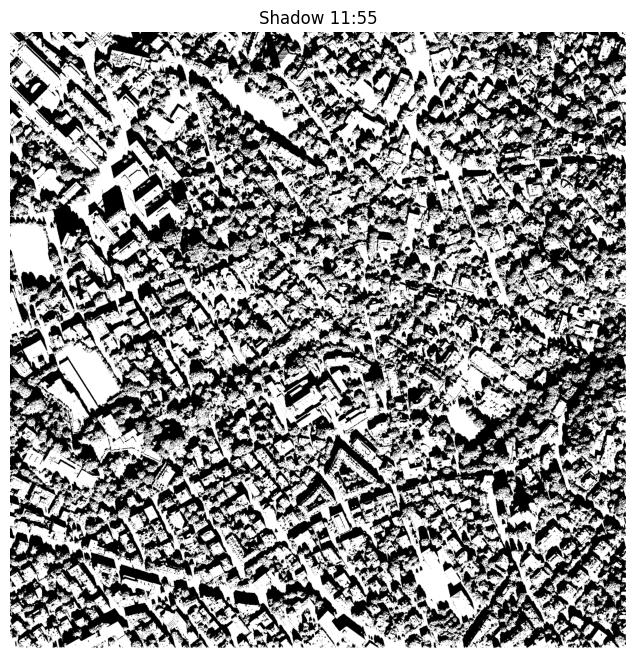

In [9]:
import matplotlib.pyplot as plt
import rasterio

shadow_path = "out_single/shadow_20250308T115500_EuropeZurich.tif"

with rasterio.open(shadow_path) as src:
    arr = src.read(1)

plt.figure(figsize=(8,8))
plt.imshow(arr, cmap="gray")
plt.title("Shadow 11:55")
plt.axis("off")

#📅 4. Generate full-day shadows (March 8, 2025)

In [10]:
!dem-shadows-generate \
    --dem demo_dem.tif \
    --out-dir out_day \
    --auto-latlon \
    --auto-timezone \
    --start 2025-03-08 \
    --end 2025-03-08 \
    --step-minutes 60

2025-11-23 21:42:19,085 [INFO] dem_shadows.utils: DEM center at lat=47.372920, lon=8.557456 (EPSG:4326)
2025-11-23 21:42:19,087 [INFO] dem_shadows.utils: DEM center at lat=47.372920, lon=8.557456 (EPSG:4326)
2025-11-23 21:42:19,161 [INFO] dem_shadows.utils: Detected timezone Europe/Zurich for lat=47.372920, lon=8.557456
Computing shadows: 100% 12/12 [00:03<00:00,  3.04it/s]


#🌓 5. Create cumulative shadow map

In [11]:
!dem-shadows-cumulate \
    --shadow-folder out_day \
    --out cumulative.tif

2025-11-23 21:42:25,618 [INFO] dem_shadows.analysis: Found 12 shadow rasters in out_day
Accumulating sun counts: 100% 12/12 [00:00<00:00, 56.88raster/s]
2025-11-23 21:42:25,853 [INFO] dem_shadows.analysis: Computed sun-count from 12 rasters; min=0, max=12
2025-11-23 21:42:25,940 [INFO] dem_shadows.analysis: Wrote cumulative sun raster to cumulative.tif


(np.float64(-0.5), np.float64(1999.5), np.float64(1999.5), np.float64(-0.5))

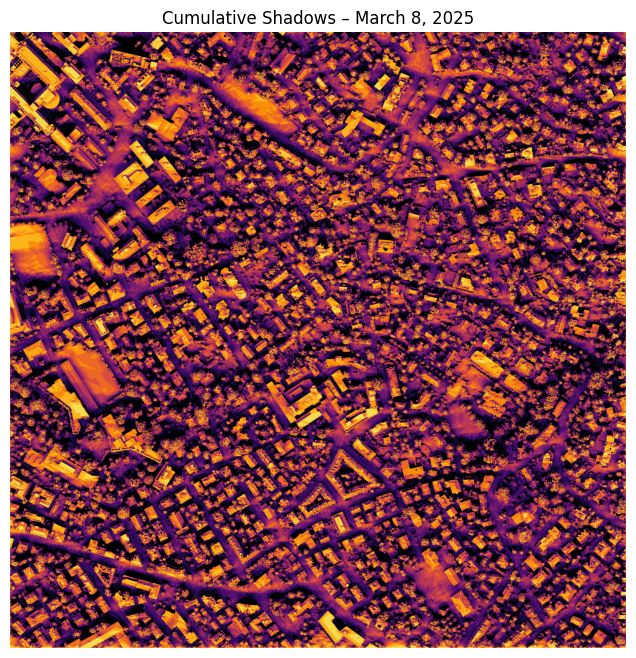

In [12]:
import matplotlib.pyplot as plt
import rasterio

with rasterio.open("cumulative.tif") as src:
    arr = src.read(1)

plt.figure(figsize=(8,8))
plt.imshow(arr, cmap="inferno")
plt.title("Cumulative Shadows – March 8, 2025")
plt.axis("off")

#🎞️ 6. Build animated GIF

In [13]:
!dem-shadows-animate \
    --shadow-folder out_day \
    --out-gif shadows.gif \
    --duration-ms 300

2025-11-23 21:42:36,378 [INFO] dem_shadows.animate: Animating 12 frames (from 12 candidates)
Frames: 100% 11/11 [00:00<00:00, 22.40frame/s]
2025-11-23 21:42:37,743 [INFO] dem_shadows.animate: Wrote GIF: shadows.gif (12 frames)


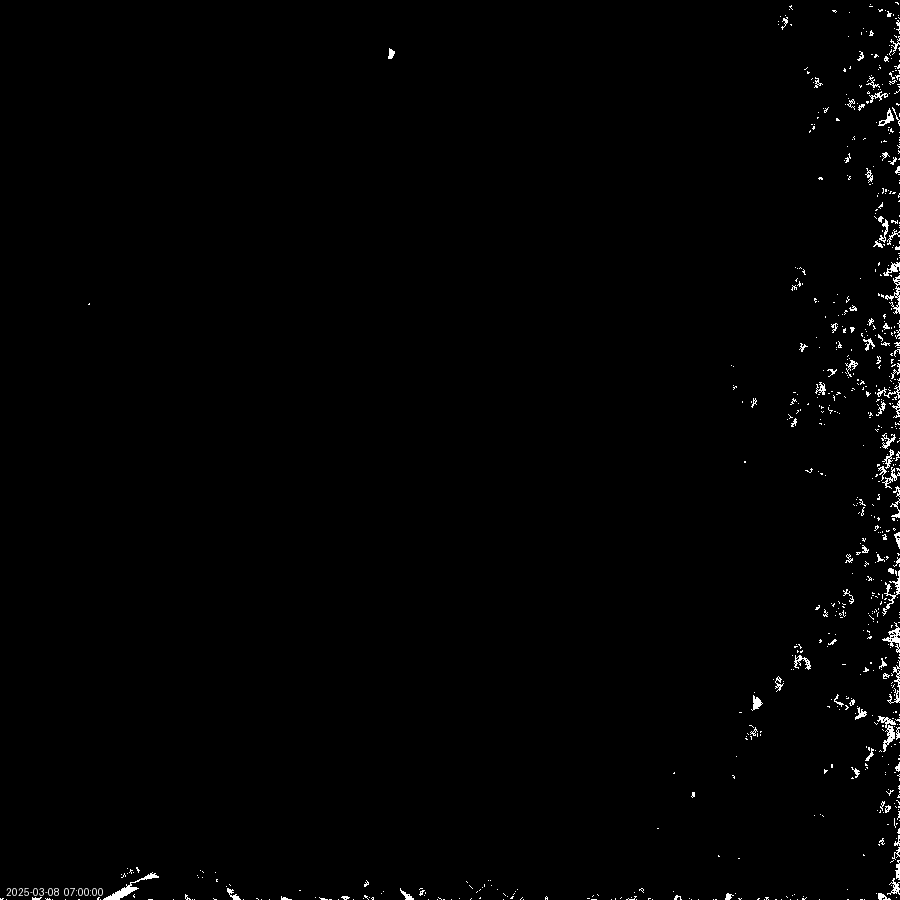

In [14]:
from IPython.display import Image
Image(filename="shadows.gif", format="gif")